目前Python实现深度学习的最佳框架就是PyTorch。本讲以PyTorch为基础，介绍神经网络的搭建与训练。
9.11.1 Torch基本语法

Torch的运算基于张量进行。张量本质上是向量与矩阵的扩展。在torch中，我们有几种常见的张量创建方法：

    随机初始化矩阵 我们可以通过torch.rand()的方法，构造一个随机初始化的矩阵：


import torch
x = torch.rand(4, 3) 
print(x)

tensor([[0.7569, 0.4281, 0.4722],
        [0.9513, 0.5168, 0.1659],
        [0.4493, 0.2846, 0.4363],
        [0.5043, 0.9637, 0.1469]])

    全0矩阵的构建 我们可以通过torch.zeros()构造一个矩阵全为 0，并且通过dtype设置数据类型为 long。除此以外，我们还可以通过torch.zero_()和torch.zeros_like()将现有矩阵转换为全0矩阵.

import torch
x = torch.zeros(4, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

    张量的构建 我们可以通过torch.tensor()直接使用数据，构造一个张量：

import torch
x = torch.tensor([5.5, 3]) 
print(x)

tensor([5.5000, 3.0000])

在接下来的内容中，我们将介绍几种常见的张量的操作方法：

    加法操作：

import torch
# 方式1
y = torch.rand(4, 3) 
print(x + y)

# 方式2
print(torch.add(x, y))

# 方式3 in-place，原值修改
y.add_(x) 
print(y)

tensor([[ 2.8977,  0.6581,  0.5856],
        [-1.3604,  0.1656, -0.0823],
        [ 2.1387,  1.7959,  1.5275],
        [ 2.2427, -0.3100, -0.4826]])
tensor([[ 2.8977,  0.6581,  0.5856],
        [-1.3604,  0.1656, -0.0823],
        [ 2.1387,  1.7959,  1.5275],
        [ 2.2427, -0.3100, -0.4826]])
tensor([[ 2.8977,  0.6581,  0.5856],
        [-1.3604,  0.1656, -0.0823],
        [ 2.1387,  1.7959,  1.5275],
        [ 2.2427, -0.3100, -0.4826]])

    索引操作：(类似于numpy)

需要注意的是：索引出来的结果与原数据共享内存，修改一个，另一个会跟着修改。如果不想修改，可以考虑使用copy()等方法

import torch
x = torch.rand(4,3)
# 取第二列
print(x[:, 1]) 

tensor([-0.0720,  0.0666,  1.0336, -0.6965])

y = x[0,:]
y += 1
print(y)
print(x[0, :]) # 源tensor也被改了了

tensor([3.7311, 0.9280, 1.2497])
tensor([3.7311, 0.9280, 1.2497])

    维度变换 张量的维度变换常见的方法有torch.view()和torch.reshape()，下面我们将介绍第一中方法torch.view()：

x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8) # -1是指这一维的维数由其他维度决定
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])

注: torch.view() 返回的新tensor与源tensor共享内存(其实是同一个tensor)，更改其中的一个，另外一个也会跟着改变。(顾名思义，view()仅仅是改变了对这个张量的观察角度)

x += 1
print(x)
print(y) # 也加了了1

tensor([[ 1.3019,  0.3762,  1.2397,  1.3998],
        [ 0.6891,  1.3651,  1.1891, -0.6744],
        [ 0.3490,  1.8377,  1.6456,  0.8403],
        [-0.8259,  2.5454,  1.2474,  0.7884]])
tensor([ 1.3019,  0.3762,  1.2397,  1.3998,  0.6891,  1.3651,  1.1891, -0.6744,
         0.3490,  1.8377,  1.6456,  0.8403, -0.8259,  2.5454,  1.2474,  0.7884])

上面我们说过torch.view()会改变原始张量，但是很多情况下，我们希望原始张量和变换后的张量互相不影响。为为了使创建的张量和原始张量不共享内存，我们需要使用第二种方法torch.reshape()， 同样可以改变张量的形状，但是此函数并不能保证返回的是其拷贝值，所以官方不推荐使用。推荐的方法是我们先用 clone() 创造一个张量副本然后再使用 torch.view()进行函数维度变换 。

注：使用 clone() 还有一个好处是会被记录在计算图中，即梯度回传到副本时也会传到源 Tensor 。 3. 取值操作 如果我们有一个元素 tensor ，我们可以使用 .item() 来获得这个 value，而不获得其他性质：

import torch
x = torch.randn(1) 
print(type(x)) 
print(type(x.item()))

<class 'torch.Tensor'>
<class 'float'>

PyTorch中的 Tensor 支持超过一百种操作，包括转置、索引、切片、数学运算、线性代数、随机数等等，具体使用方法可参考官方文档。

https://pytorch.org/docs/stable/tensors.html

当对两个形状不同的 Tensor 按元素运算时，可能会触发广播(broadcasting)机制：先适当复制元素使这两个 Tensor 形状相同后再按元素运算。

In [24]:

x = torch.arange(1, 3).view(1, 2)
print(x)
y = torch.arange(1, 4).view(3, 1)
print(y)
print(x + y)

tensor([[1, 2]])
tensor([[1],
        [2],
        [3]])
tensor([[2, 3],
        [3, 4],
        [4, 5]])

tensor([[1, 2]])
tensor([[1],
        [2],
        [3]])
tensor([[2, 3],
        [3, 4],
        [4, 5]])


NameError: name 'tensor' is not defined


由于x和y分别是1行2列和3行1列的矩阵，如果要计算x+y，那么x中第一行的2个元素被广播 (复制)到了第二行和第三行，⽽y中第⼀列的3个元素被广播(复制)到了第二列。如此，就可以对2个3行2列的矩阵按元素相加。

全连接神经网络搭建

In [25]:
import torch
import pandas as pd
import numpy as bp
from sklearn import datasets #划分测试集和训练集
import torch.nn.functional as Fun
#functional子模块包含了许多不需要持有状态（例如，权重）的函数，这些函数通常用于实现神经网络中的激活函数、池化操作、卷积操作等。

dataset = datasets.load_iris()
feature_names = dataset.feature_names
target_names = dataset.target_names
df = pd.DataFrame(data=dataset.data, columns=feature_names)
print(df.head())


dataut=dataset['data']  #数据集中的特征矩阵赋值给变量 dataut
priciple=dataset['target'] #目标向量（分类标签）赋值给变量 priciple
input=torch.FloatTensor(dataset['data'])
label=torch.LongTensor(dataset['target'])
#定义BP神经网络
class Network(torch.nn.Module): 
        def __init__(self,n_future,n_hidden,n_output):
                super().__init__()
                self.hidden = torch.nn.Linear(n_future,n_hidden)
                self.output = torch.nn.Linear(n_hidden,n_output) #从输入到隐藏层是线性的，从隐藏层到输出也是线性的
        def forward(self,x):
                x = Fun.relu(self.hidden(x)) # 隐藏层的激活函数,采用relu,也可以采用sigmod,tanh
                x = self.output(x) # 输出层不用激活函数
                return x
        
net = Network(n_future = 4, n_hidden = 20, n_output = 3) 
'''#n_feature:输入的特征维度,n_hiddenb:神经元个数,n_output:输出的类别个数,具体问题具体分析'''
#定义优化器损失函数,因为拟合会有偏差
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()  ## 对于多分类一般采用的交叉熵损失函数

#训练数据
for t in range(500):
        output = net(input)
        loss = loss_func(output, label)
        optimizer.zero_grad()    # 梯度清零
        loss.backward()          # 前馈操作
        optimizer.step()         # 使用梯度优化器,权重更新
        

#  得出结果
output = net(input)
prediction = torch.max(output, 1)[1] # 返回index  0返回原值
'''
torch.max(output, 1): 这个函数计算每一行的最大值及其索引。这里 1 表示沿着张量的第一维度（即行方向）进行操作。这将返回一个包含两个元素的元组，第一个元素是最大值，第二个元素是最大值所在的索引。[1]: 这里我们只关心最大值所在的索引，即预测类别，因此选取元组中的第二个元素'''
pred_y = prediction.data.numpy()
target_y = label.data.numpy()

#衡量准确率
accurancy = float((pred_y==target_y).astype(int).sum())/float(target_y.size)
print(accurancy)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
0.9733333333333334


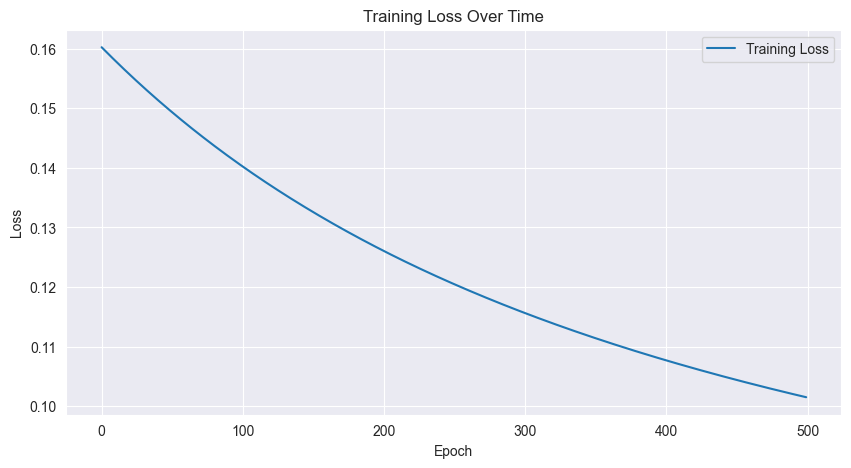

In [26]:
import matplotlib.pyplot as plt

# 初始化一个列表来存储损失值
losses = []

# 修改训练循环来记录损失
for t in range(500):
    output = net(input)
    loss = loss_func(output, label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 记录损失值
    losses.append(loss.item())

# 绘制损失变化曲线
plt.figure(figsize=(10, 5))
plt.plot(range(len(losses)), losses, label='Training Loss')
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

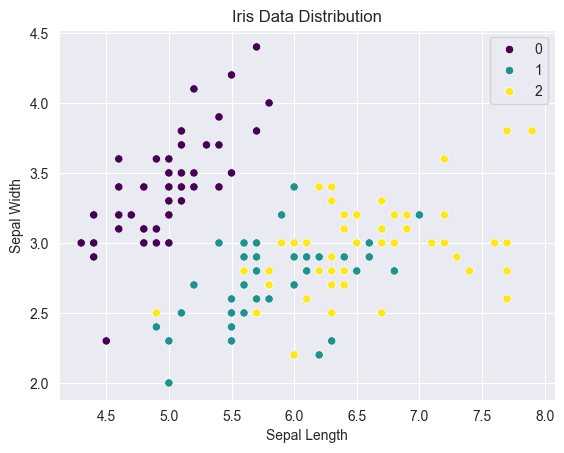

In [27]:
import seaborn as sns

# 可视化数据分布
sns.scatterplot(x=dataut[:, 0], y=dataut[:, 1], hue=priciple, palette='viridis')
plt.title('Iris Data Distribution')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

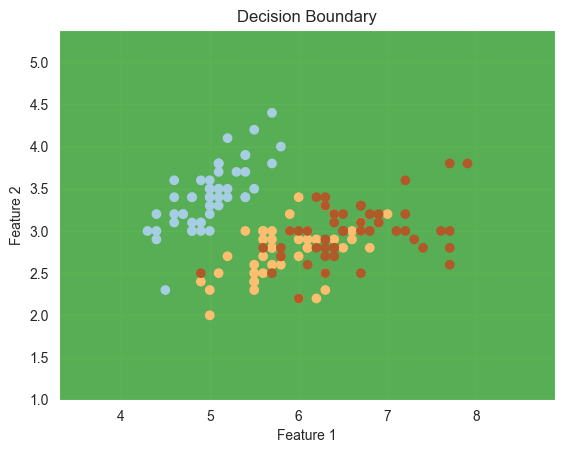

In [35]:
# 创建网格点
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
# 这里我们只关注前两个特征，因为我们将绘制这两个特征的决策边界
Z_grad = np.c_[xx.ravel(), yy.ravel()]
# 将网格点转换为 PyTorch 张量，并添加缺失的特征以匹配模型的输入
Z_tensor = torch.from_numpy(Z_grid).float()
Z_tensor = torch.cat([Z_tensor, torch.zeros(Z_tensor.shape[0], 2)], dim=1)  # 添加两个全零列
# 通过模型进行预测
with torch.no_grad():
    Z_pred = net(Z_tensor)
    _, predicted = torch.max(Z_pred, 1)
# 将预测结果转换回 NumPy 数组
Z_pred_np = predicted.numpy().reshape(xx.shape)
# 绘制决策边界
plt.contourf(xx, yy, Z_pred_np, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()

 在神经网络中，激活函数的作用是引入非线性，使得网络能够学习和近似复杂的函数。如果没有激活函数，无论神经网络有多少层，最终都只能表示线性映射，这限制了网络的表达能力。常见的激活函数包括 Sigmoid、tanh 和 softmax。

Sigmoid 函数：将实数映射到 (0,1) 区间，其公式为 f(x) = 1 / (1 + e^(-x))。Sigmoid 函数的输出范围在 0 到 1 之间，这使得它可以被用于二分类问题的输出层。

tanh 函数：将实数映射到 (-1,1) 区间，其公式为 f(x) = (e^(x) - e^(-x)) / (e^(x) + e^(-x))。与 Sigmoid 函数类似，但输出范围是 -1 到 1，它在某些情况下可以提供更好的数值稳定性。

-Softmax 函数：将实数映射为一组表示概率分布的值，其公式为 f(x_i) = e^(x_i) / Σ(e^(x_j))，其中 i 和 j 是输入向量的元素索引。Softmax 函数常用于多分类问题的输出层，因为它的输出可以解释为属于各个类别的概率。

学习率（Learning Rate）：学习率决定了模型在每次迭代中更新权重的幅度。如果学习率过大，可能导致模型震荡而无法收敛；如果学习率过小，则可能导致训练速度缓慢。因此，需要根据实际情况选择一个合适的学习率。
   

批处理大小（Batch Size）：批处理大小决定了每次迭代中使用多少样本进行权重更新。较大的批处理大小可能会加快训练速度，但也可能导致内存不足；较小的批处理大小则可以减少内存使用，但训练速度可能会变慢。

In [ ]:
    # 创建数据加载器
dataloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)
# 训练数据
for epoch in range(500):
    for inputs, targets in dataloader:
        # 前向传播
        output = net(inputs)
        # 计算损失
        loss = loss_func(output, targets)        
        # 梯度清零
        optimizer.zero_grad()    
        # 反向传播
        loss.backward()
        # 更新权重
        optimizer.step()

迭代次数（Epochs）：迭代次数决定了整个数据集被遍历的次数。过多的迭代可能会导致过拟合，而太少的迭代则可能无法充分训练模型。
    

正则化参数（Regularization Parameters）：正则化用于防止模型过拟合。常见的正则化参数包括L1和L2正则化系数、dropout概率等。这些参数可以帮助控制模型的复杂度，避免过度拟合训练数据。
    

优化器（Optimizer）：优化器决定了如何更新模型的权重。常见的优化器有SGD（随机梯度下降）、Adam、RMSprop等。不同的优化器适用于不同的问题和数据集，选择合适的优化器也是调节参数的一个重要方面。

为了优化误差反向传播算法的训练过程，我们可以采取多种策略来提升神经网络的性能和训练效率。：

1. 学习率调整：选择合适的学习率对训练过程至关重要。如果学习率太高，可能会导致模型在最优解附近震荡；如果学习率太低，训练过程可能会非常缓慢。使用自适应学习率算法，如Adam，可以帮助我们在训练过程中自动调整学习率，使模型更快收敛。

2. 批量大小的选择：批量大小决定了每次参数更新前要处理的数据量。较大的批量可以提供更稳定的梯度估计，但计算成本更高；较小的批量可以更快地适应参数更新，但可能导致梯度估计不稳定。实践中，可以尝试不同的批量大小，找到适合当前任务的最佳值。

3. 权重初始化：在训练开始时，如何初始化权重对模型的收敛速度和最终性能有显著影响。使用如He初始化或Xavier初始化等策略，可以减少训练初期的梯度消失或爆炸问题，从而加速收敛。

4. 正则化技术：为了防止模型过拟合，我们可以在训练过程中加入正则化项，如L1或L2正则化。此外，Dropout是一种简单而有效的正则化方法，它通过在训练过程中随机“丢弃”一部分神经元，减少了模型对特定参数的依赖，增强了泛化能力。

5. 早停策略：当我们在训练集上不断改进模型，但在验证集上的性能停止提升时，可能是过拟合的信号。此时，采用早停策略，即停止进一步训练，可以避免过拟合，保持模型的泛化性能。

6. 激活函数的选择：激活函数为神经网络引入非线性，选择合适的激活函数可以影响模型的学习能力。ReLU（Rectified Linear Unit）是目前常用的激活函数之一，因为它在正区间内保持梯度不衰减，有助于加速训练。

7. 优化器的选用：除了传统的梯度下降，还有许多改进的优化器可供选择，如带动量的梯度下降和Nesterov加速梯度（NAG）。这些优化器通过考虑之前梯度的动量，帮助模型更有效地逃离局部最小值和鞍点。

8. 网络结构的调整：根据具体任务的需求，可以尝试调整网络结构，比如增加或减少隐藏层的数量，或者改变层间的连接方式。这些调整可以帮助模型更好地捕捉数据的特征，提高性能。

9. 数据增强：在训练数据中引入变化，如旋转、缩放、裁剪等，可以增加数据的多样性，使模型对输入的微小变化，减少过拟合的风险。

10. 梯度裁剪：在训练过程中，有时梯度的值会变得非常大，导致参数更新不稳定。通过梯度裁剪，我们可以限制梯度的最大值，防止梯度爆炸问题。

那么神经网络能不能用在时间序列里面呢？当然是可以的，神经网络若将上一步获得的输出作为下一步的输入，这就构成了一个循环神经网络。

loss = 362.4645690917969


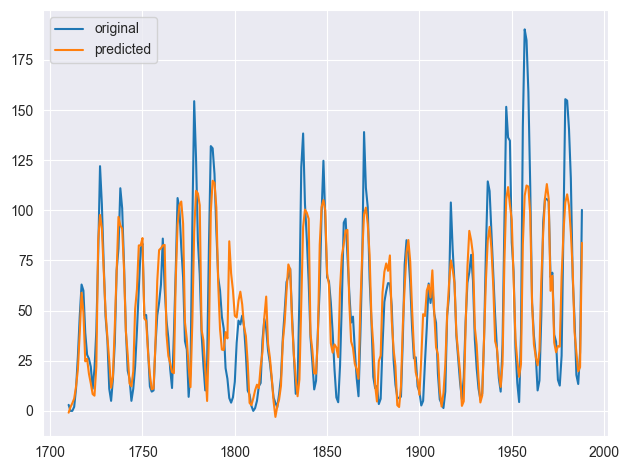

In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sunpoint = pd.read_csv("E:/BaiduNetdiskDownload/sunspots.csv")
data = np.array(sunpoint['counts'])
dates = sunpoint['year']
seq_1 = 10
# 构造 rnn 模型数据结构
def rnn_data(sequence,length):
    output_sequence = np.zeros([sequence.shape[0]-length, length, 1])  # [batch, seq, feature]
    output_y = np.zeros([sequence.shape[0]-length, 1])
    for i in range(sequence.shape[0] - length):
        output_sequence[i, :, 0] = sequence[i:(i+length)]
        output_y[i, 0] = sequence[i+length]
    return output_sequence, output_y
x,y = rnn_data(data,seq_1)
x_tensor = torch.tensor(x, dtype=torch.float)
y_tensor = torch.tensor(y, dtype=torch.float)


class LSTM(torch.nn.Module):
    def __init__(self, n_input, n_hidden , n_output,seq_1):
        super().__init__()
        self.lstm = torch.nn.LSTM(n_input, n_hidden, batch_first=True)
        self.linear = torch.nn.Linear(n_hidden*seq_1,n_output)
    def forward(self,x_input):
        x_input,_ = self.lstm(x_input)
        b, s, f = x_input.shape  # batch_size, sequence_length, feature_number
        x_input = x_input.reshape(b,s*f)
        x_input = self.linear(x_input)
        return x_input


net = LSTM(n_input=1, n_hidden=12, n_output=1, seq_1= seq_1)  # 网络
loss_function = torch.nn.MSELoss()  # 损失函数
'''MSE 常用于回归问题，计算的是预测值与实际值之间的平方差的平均值。'''
optimizer = torch.optim.Adam(net.parameters())  # 优化器 Adam自适应学习率优化算法
epoch = 5000  # 最大迭代次数

for i in range(epoch):
    optimizer.zero_grad()
    y_predict  = net(x_tensor)
    loss = loss_function(y_predict, y_tensor)
    loss.backward()
    optimizer.step()
    
     # 拟合曲线图
    if i == 4999:
        print('loss =', loss.item())
        #x_plot = x_tensor.detach().numpy()
        # 获取横坐标数据
        # 注意：这里我们假设原始数据的日期是按照顺序排列的
        # 只保留训练数据集的时间戳
        dates_for_x = dates[seq_1:len(y_plot) + seq_1]
        y_predict_plot = y_predict.detach().numpy()
        y_plot = y_tensor.detach().numpy()
        #plt.clf()
        plt.plot(dates_for_x,y_plot, label='original')
        plt.plot(dates_for_x,y_predict_plot, label='predicted')
        plt.legend()
        plt.tight_layout()
        #plt.pause(0.5)
        #plt.ioff()
        plt.show()
    